# Generazione di numeri casuali

La generazione di numeri casuali è essenziale ormai in ogni tipo di applicazione, per esempio in finanza e in statistica (simulazioni Monte Carlo).
Algoritmi e computer son, però, deterministici, dunque si son sviluppate varie tecniche per generare numeri pseudo-casuali con buone proprietà (bassa autocorrelazione, uniformità, riproducibilità…).

In particolare, ci concentriamo sulla generazione di numeri casuali da una distribuzione uniforme continua, dalla quale si può semplicemente passare a molte altre distribuzioni note (e.g. Bernoulli, Esponenziale etc) e vediamo una semplice applicazione del generatore così costruito, con la simulazione di una passeggiata aleatoria.

Se si volesse ottenere dei numeri davvero random (e.g. in crittografia), si dovrebbe ricorrere, tuttavia, ad altri metodi (difficilmente implementabili in Python ;) ), come mostrato in https://www.youtube.com/watch?v=1cUUfMeOijg&feature=youtu.be


PS Il codice qui presentato è scritto in modo semplice, senza ricorrere a ottimizzazioni particolari.



# Generatore Lineare Congruenziale



Iniziamo il progetto implementando un semplice generatore di numeri pseudo-casuali, il Generatore Lineare Congruenziale, algoritmo utilizzato, per esempio, dal comando rand di C, che si basa su un una immediata relazione ricorsiva.
Il funzionamento è descritto dall'algoritmo seguente :

• Spazio degli stati = {0, 1, . . . , m − 1} (m = modulo)

• Passo di ricorsione :  Xn = (a * Xn−1 + c) mod m

• output Un = Xn/m.

Più info su https://it.wikipedia.org/wiki/Generatore_lineare_congruenziale



In [50]:
state = 10 # stato interno del generatore (inizializzato a piacere) -> con stato uguale, si otterrà sempre la stessa sequenza 

#Lewis Goodman Miller generator con questi parametri:

def LCG() -> float:
  a = 16807 
  c = 12343
  m = 27 # abbassare per un generatore scrauso come vogliamo noi
  global state # per modificare all'interno di una funzione una variabile globale è necessario dichiararla globale, per ora non ce ne preoccupiamo
  state = (a * state + c) % m

  return state/m

Ora vogliamo testare il nostro generatore. Proviamo a vedere quanto è il **periodo** del nostro generatore, ovvero dopo quanto tempo inizia a ripetere la stessa sequenza di numeri. 

Un buon generatore dovrebbe avere un periodo il più alto possibile.
Per l'utilizzo attuale nelle simulazioni Monte Carlo, serve un periodo molto alto; il random di base di python ha un periodo di 2^19937-1. 

(il random di base di python non è comunque utilizzabile per la crittografia, in quanto, conoscendo l'algoritmo sottostante, lo stato è precisamente indovinabile dopo 624 numeri generati (https://github.com/kmyk/mersenne-twister-predictor)

NB Per chiamare una funzione senza argomenti come la nostra e assegnare il valore restituito ad una variabile var, è necessario soltanto usare
var = LCG(). 

In [52]:
vec = []
terminate = 0

while not terminate:
  a = LCG()
  if a not in vec:
    vec.append(a)
  else:
    print(len(vec))
    terminate = 1


27


# Passeggiata Aleatoria Bidimensionale

A questo punto, proviamo a usare il nostro generatore per simulare una passeggiata aleatoria bidimensionale discreta.

Partendo dal punto (0,0), ad ogni iterazione, un punto si muove di 1 unità in una delle quattro direzioni possibili (e.g. da (0,0) si può muovere in (1,0),(-1,0),(0,1),(0,-1)) 
con probabilità pi (inizialmente p1 = p2 = p3 = p4 = 0.25). Usando il generatore di numeri casuali appena costruito per campionare da un'uniforme continua in [0,1], simulare la passeggiata aleatoria. 

Conservare la posizione ad ogni istante temporale del punto in due liste separate x_list e y_list (per le coordinate x ed y).

In [13]:
x_list = []
y_list = []
x = 0
y = 0

# uno potrebbe preallocare le liste, sapendo esattamente la loro lunghezza. In Python, è una ottimizzazione molto utile,
# anche se non fondamentale. Proviamo a vedere in fondo al notebook quanto sia il vantaggio portato dall'allocazione delle liste in partenza.

n = 10000
p1 = p2 = p3 = 0.25

for i in range(n):
    r = LCG()
    if r<=p1:
    x += 1
    elif p1<r<=p1+p2:
    x -= 1
    elif p1+p2<r<=p1+p2+p3:
    y += 1
    elif p1+p2+p3<r<=1:
    y -= 1
    x_list.append(x)
    y_list.append(y)


Qui finisce la parte di coding dell'assignment, eseguire le celle successive per installare matplotlib, visualizzare il risultato e rispondere alle ultime domande.

In [ ]:
!pip install matplotlib

Ora, proviamo a rappresentare graficamente la passeggiata aleatoria.
Simulare per 100, 1000 e 20000 passi la passeggiata aleatoria. Dopo ogni simulazione, eseguire il codice sottostante e guardare l'output. Provare anche a cambiare i vari parametri del LCG, soprattutto m (orientativamente numero dispari tra 10 e 10000).

Cosa si può osservare? è davvero aleatoria?

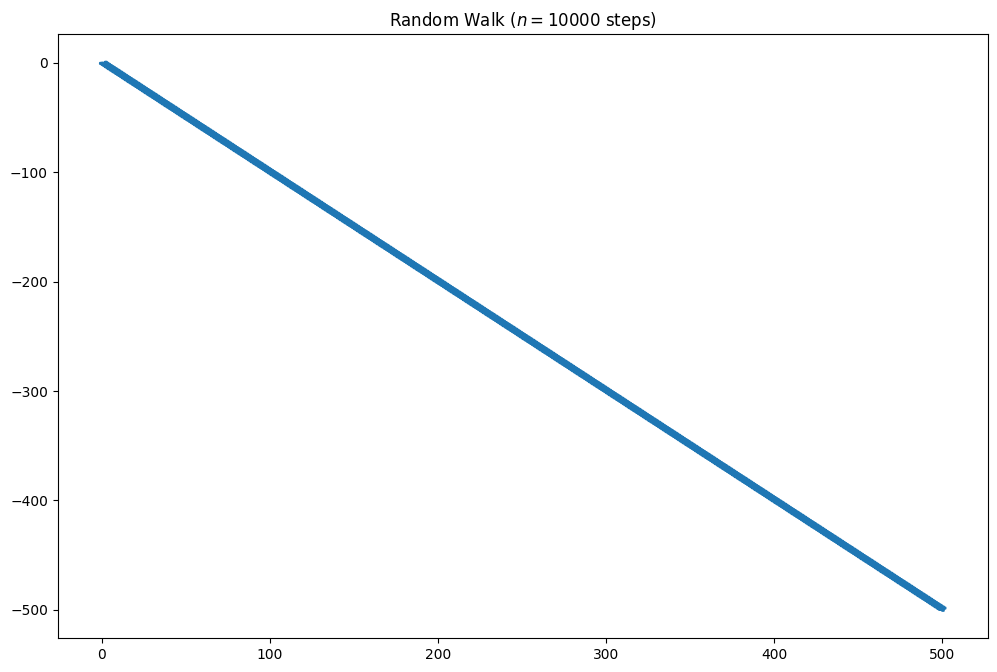

In [14]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.title("Random Walk ($n = " + str(n) + "$ steps)") 

plt.plot(x_list,y_list)
plt.show()

Dipende dai valori dei parametri e, in particolare, dal periodo del generatore. Con una scelta debole dei parametri, la passeggiata è periodica e, dunque, si possono vedere dei patterns ricorrenti. Se, per esempio, usiamo il random di Python (o il nostro generatore con parametri adeguati, e.g. quelli del generatore di Lewis Goodman Miller)  vediamo subito come la passeggiata sembri davvero aleatoria, dato che il periodo è $$2^{19937}-1$$.

In [69]:
x_list = [0]
y_list = [0]
# inizializzo la passeggiata aleatoria in 0,0 in modo da rappresentarla poi nel grafico. Si può ovviamente non fare, strutturando diversamente il codice
# oppure non mostrare il punto 0,0.

x = 0
y = 0

import random
n = 1000
p1 = p2 = p3 = 0.25

for i in range(n):
  r = random.random()
  if r<=p1:
    x += 1
  elif p1<r<=p1+p2:
    x -= 1
  elif p1+p2<r<=p1+p2+p3:
    y += 1
  elif p1+p2+p3<r<=1:
    y -= 1
  x_list.append(x)
  y_list.append(y)


1001
[0, -1, -1, -1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, -1, -1, -1, -2, -2, -2, -3, -3, -3, -3, -3, -4, -5, -5, -4, -4, -4, -5, -5, -4, -4, -4, -4, -3, -3, -3, -4, -4, -4, -3, -2, -2, -3, -2, -2, -3, -3, -3, -2, -2, -3, -3, -3, -4, -5, -6, -6, -7, -7, -7, -8, -9, -8, -8, -9, -10, -11, -12, -12, -12, -12, -13, -12, -12, -13, -13, -13, -12, -12, -13, -13, -14, -14, -13, -13, -13, -14, -14, -14, -13, -12, -12, -13, -12, -13, -12, -12, -13, -14, -15, -14, -13, -13, -12, -11, -11, -11, -11, -12, -11, -12, -11, -11, -11, -11, -12, -12, -13, -14, -14, -14, -14, -14, -14, -13, -14, -15, -15, -16, -16, -16, -16, -15, -15, -16, -16, -16, -17, -17, -17, -18, -18, -18, -18, -18, -19, -19, -19, -20, -21, -21, -22, -22, -22, -21, -22, -22, -21, -21, -20, -20, -20, -20, -21, -22, -22, -22, -23, -23, -23, -24, -25, -26, -25, -24, -25, -24, -25, -26, -26, -25, -24, -24, -24, -23, -24, -25, -25, -26, -25, -26, -26, -27, -27, -27, -28, -28, -29, -28, -29, -30, -31, -32, -31, -31, -31, -31, -31, -30, 

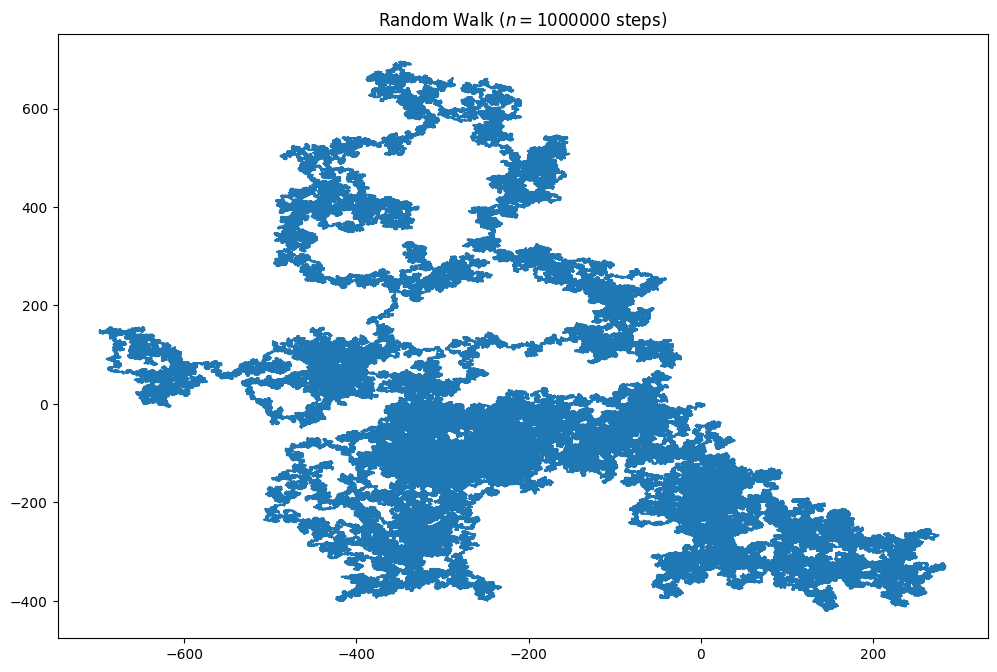

In [22]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.title("Random Walk ($n = " + str(n) + "$ steps)") 

plt.plot(x_list,y_list)
plt.show()

In [30]:
state = 10

def Lewis_Miller_LCG() -> float:
  a = 16807 
  c = 0
  m = 2**31-1
  global state 
  state = (a * state + c) % m

  return state/m

In [35]:
x_list = [0]
y_list = [0]
x = 0
y = 0

n = 1000000
p1 = p2 = p3 = 0.25

for i in range(n):
  r = Lewis_Miller_LCG()
  if r<=p1:
    x += 1
  elif p1<r<=p1+p2:
    x -= 1
  elif p1+p2<r<=p1+p2+p3:
    y += 1
  elif p1+p2+p3<r<=1:
    y -= 1
  x_list.append(x)
  y_list.append(y)

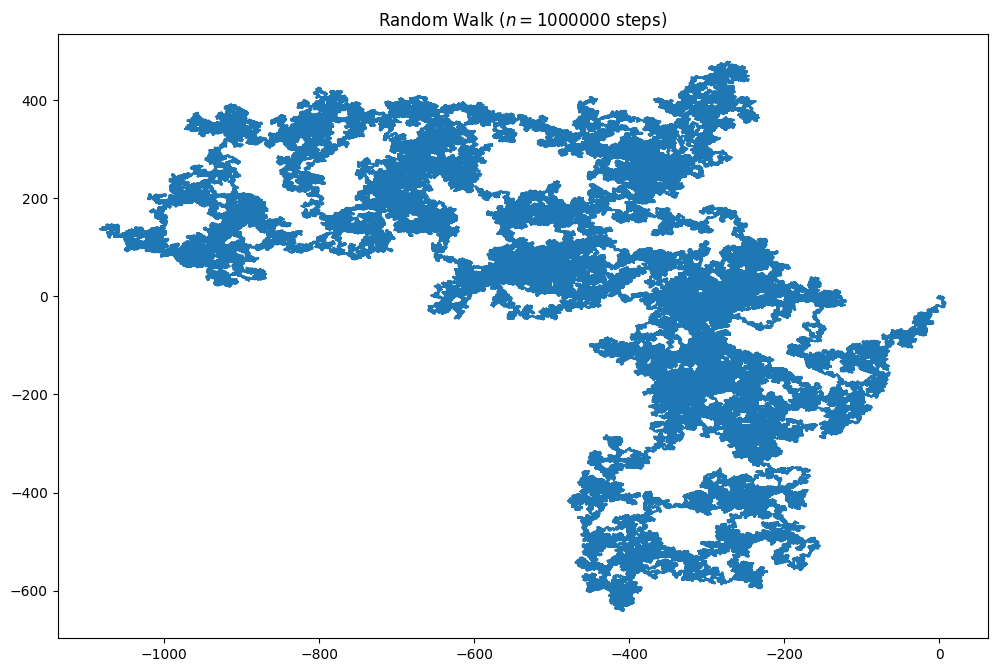

In [36]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.title("Random Walk ($n = " + str(n) + "$ steps)") 

plt.plot(x_list,y_list)
plt.show()

BONUS

Poichè, in realtà, in questo caso, utilizziamo più volte lo stesso codice, avrebbe senso modularizzarlo. Costruiamo dunque una funzione che simuli la passeggiata aleatoria e la plotti. Come argomenti di ingresso diamo il numero di iterazioni e il generatore di numeri casuali che vogliamo utilizzare. 
Una possibile implementazione è:


In [64]:
def Simulate_random_walk(RNG, n_iters):

    x_list = [0]
    y_list = [0]
    x = 0
    y = 0
    p1 = p2 = p3 = 0.25

    for i in range(n_iters):
        r = RNG()
        if r<=p1:
            x += 1
        elif p1<r<=p1+p2:
            x -= 1
        elif p1+p2<r<=p1+p2+p3:
            y += 1
        elif p1+p2+p3<r<=1:
            y -= 1
        x_list.append(x)
        y_list.append(y)

    fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    plt.title("Random Walk ($n = " + str(n_iters) + "$ steps)") 
    plt.plot(x_list,y_list)
    plt.show()


Appendice

Vediamo effettivamente in questo caso quanto vantaggio porti preallocare le liste utilizzando una grande feature dei notebook, il comando %timeit, uno dei cosiddetti comandi 'magici' dei notebook. (per approfondire : https://ipython.readthedocs.io/en/stable/interactive/magics.html)

In [72]:
def NoAllocation(n_iters):

    x_list = [0]
    y_list = [0]
    x = 0
    y = 0
    p1 = p2 = p3 = 0.25
    for i in range(n_iters):
        r = random.random()
        if r<=p1:
            x += 1
        elif p1<r<=p1+p2:
            x -= 1
        elif p1+p2<r<=p1+p2+p3:
            y += 1
        elif p1+p2+p3<r<=1:
            y -= 1
        x_list.append(x)
        y_list.append(y)

def Allocation(n_iters):

    x_list = [0]*(n_iters+1)
    y_list = [0]*(n_iters+1)
    x = 0
    y = 0
    p1 = p2 = p3 = 0.25
    for i in range(1,n_iters+1):
        r = random.random()
        if r<=p1:
            x += 1
        elif p1<r<=p1+p2:
            x -= 1
        elif p1+p2<r<=p1+p2+p3:
            y += 1
        elif p1+p2+p3<r<=1:
            y -= 1
        x_list[i] = x
        y_list[i] = y



Il comando %timeit esegue un più chiamate alla funzione (il numero viene calibrato automaticamente in base al tempo di ogni iterazione) e restituisce una media del tempo impiegato. Vediamo come allocare la lista porti un vantaggio computazionale comunque non indifferente, di un 15-20% circa sul totale.

In [82]:
%timeit NoAllocation(1000)
%timeit Allocation(1000)

1000 loops, best of 3: 335 µs per loop
1000 loops, best of 3: 275 µs per loop


Per dubbi, approfondimenti o altro, sia sulla soluzione che sul punteggio ottenuto nell'esercizio, non esitate a scrivermi al +393386561042 o su filippo.fedeli@mail.polimi.it